# dataprep example

This notebook will show how the functions contained within the dataprep model are used to generate hdf5 files for storing raw data and peak fitting results.

In [3]:
import os
import h5py
import matplotlib.pyplot as plt
from ramandecompy import dataprep


### dataprep.new_hdf5

The first function in the module simply generates a new `.hdf5` file in your active directory. The only input required is the desired name of the file. Typically, a user will want to generate two files: a `calibration.hdf5` and an `experiment,hdf5`. If a .hdf5 file with that name already exists, an error will be thrown.

In [5]:
dataprep.new_hdf5('dataprep_calibration')

OSError: Unable to create file (unable to open file: name = 'dataprep_calibration.hdf5', errno = 17, error message = 'File exists', flags = 15, o_flags = a02)

### dataprep.view_hdf5

The module contains a function (`dataprep.view_hdf5`) that will help display the groups and dataset contained within the `.hdf5` file. At this point, `dataprep_calibration.hdf5` is empty so only the filename is output. `dataprep.view_hdf5` displays groups in **bold** and datasets in a standard font.

In [6]:
dataprep.view_hdf5('dataprep_calibration.hdf5')

**** dataprep_calibration.hdf5 ****


### dataprep. add_calibration

There are two functions for adding data to a .hdf5 file. The first is `dataprep.add_calibration` and is used to add calibration data to a `calibration.hdf5`

In [8]:
dataprep.add_calibration('dataprep_calibration.hdf5',
                         '../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx',
                         label='Hydrogen')

In [9]:
dataprep.view_hdf5('dataprep_calibration.hdf5')

**** dataprep_calibration.hdf5 ****
Hydrogen
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    wavenumber


In [20]:
#for area
calibration = h5py.File('dataprep_calibration.hdf5', 'r')
peak1 = calibration['Hydrogen/Peak_01']
list(peak1)[6]

8435.87836721256

Now using `dataprep.view_hdf5` we can see that our `dataprep_calibration_hdf5` file now contains one 1st order group named with our assigned label. This group contains 6 datasets. The first four datasets consist of of the six fit parameters defining the pseudo-Voigt profiles of each detected peak. The last two datasets are the raw x (wavenumber) and y (counts) values from the calibration spectra.  

Next we will add one more set of calibration data to `dataprep_calibration.hdf5`.

In [11]:
dataprep.add_calibration('dataprep_calibration.hdf5',
                         '../ramandecompy/tests/test_files/Methane_Baseline_Calibration.xlsx',
                         label='Methane')

In [12]:
dataprep.view_hdf5('dataprep_calibration.hdf5')

**** dataprep_calibration.hdf5 ****
Hydrogen
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    wavenumber
Methane
|    Peak_01
|    counts
|    wavenumber


Using `dataprep.view_hdf5` we can now see that both **Hydrogen** and **Methane** groups are contained within the file. The detected and fitted peak profiles are saved under each group along with the raw data. In this way, we see how multiple calibration data can be stored within a single `calibration.hdf5`.  

### dataprep.add_experiment

Next we will see how the slighly different function `dataprep.add_experiment` operates and how it stores experimental data under groups that specify the temperature and residence time for each experiment added. First we will make a new `experiment.hdf5` file to store the experimental data. Importing this file will take longer than the earlier examples since this spectra contains a larger number of peaks that need to be fit. 

In [22]:
#dataprep.new_hdf5('dataprep_experiment')
#dataprep.add_experiment('dataprep_experiment.hdf5', '../ramandecompy/tests/test_files/FA_3.6wt__300C_25s.csv')
dataprep.add_experiment('dataprep_experiment.hdf5', '../ramandecompy/tests/test_files/FA_3.6wt%_300C_35s.csv')

In [23]:
dataprep.view_hdf5('dataprep_experiment.hdf5')

**** dataprep_experiment.hdf5 ****
300C
|    25s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    wavenumber
|    35s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    wavenumber


### dataprep.plot_fit

The last function is the module is `dataprep.plot_fit` which allows for a visual inspection of the detected peak locations for any spectra saved in a `.hdf5`. This gives the user an opportunity not only to view the spectra data, but also to verify that all peaks were correctly identified as part of the fitting process.

(<Figure size 1080x360 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x1c1abaceb8>)

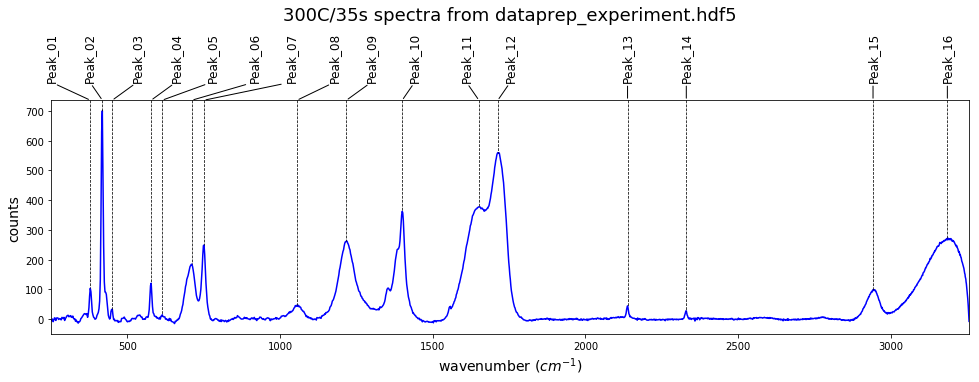

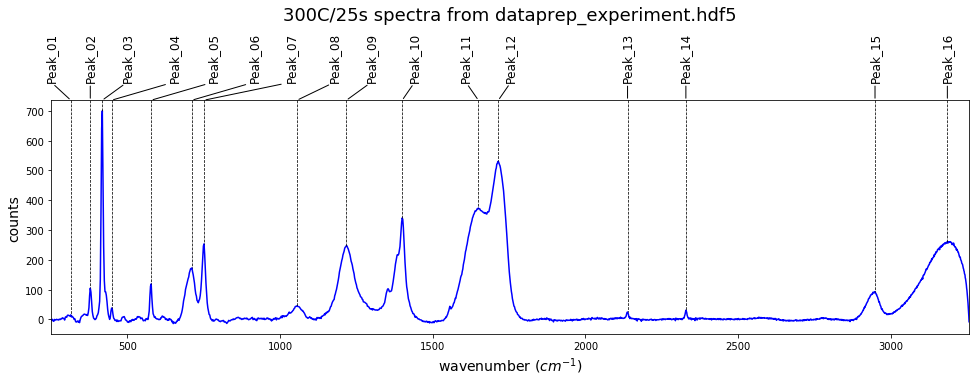

In [25]:
dataprep.plot_fit('dataprep_experiment.hdf5', '300C/35s')
dataprep.plot_fit('dataprep_experiment.hdf5', '300C/25s')

In order to keep the file system clean, and to avoid errors associated with running this notebook multiple times, we lastly will delete the two `.hdf5` files generated by this notebook. Comment out the final cell if you wish you explore these files further. 

In [12]:
os.remove('dataprep_calibration.hdf5')
os.remove('dataprep_experiment.hdf5')